In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# import xgboost as xgb

from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

In [2]:
database = pd.read_csv('database.csv')
database.head()

,idx,title_raw,text_raw,title,text,content,_topic_
0,0387659,\n\n SYSTEMS AND METHODS FO...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...,system_method_agronomy; crop_agricultural_datu...
1,10729058,\n\n Systems and methods fo...,\n The present disclosure provides ...,systems and methods for adjusting the output o...,the present disclosure provides systems and me...,systems and methods for adjusting the output o...,system_method_agronomy; crop_agricultural_datu...
2,6745128,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...,system_method_agronomy; crop_agricultural_datu...
3,6549852,\n\n Methods and systems fo...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...,system_method_agronomy; crop_agricultural_datu...
4,0018431,\n\n METHODS AND SYSTEMS FO...,\n Methods and systems for characte...,methods and systems for managing farmland,methods and systems for characterizing and man...,methods and systems for managing farmland meth...,system_method_agronomy; crop_agricultural_datu...


In [3]:
database_train = database[database['_topic_'].notna()]
# database_ = database[not database['_topic_'].isna()]

In [4]:
vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(database_train['content'])

In [5]:
df_doc_vec = pd.DataFrame(doc_vec.toarray(), columns = vectorizer.get_feature_names())
df_doc_vec.shape

(817, 3492)

In [6]:
df_doc_vec.head()

,001,006,00s07,01,01dhd10,01hf13,01hfi3,08pb,09dsq1,10,...,yields,you,zea,zein,zeolite,zinc,zn,zone,zones,μmol
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302722,0.094173,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302722,0.094173,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302722,0.094173,0.0


In [7]:
X = df_doc_vec
y = database_train['_topic_'].to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(612, 3492) (205, 3492) (612,) (205,)


In [10]:
# teste com random forest

In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8

In [12]:
rf_scores = cross_val_score(rf, X, y, cv=10)
print(rf_scores)
print(np.mean(rf_scores))

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.81707317 0.76829268 0.79268293 0.81707317 0.85365854 0.84146341
 0.86585366 0.87654321 0.86419753 0.85185185]
0.8348690153568203


In [13]:
# teste com Naive Bayes

In [14]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.8048780487804879

In [15]:
nb_scores = cross_val_score(nb, X, y, cv=10)
print(nb_scores)
print(np.mean(nb_scores))

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.81707317 0.76829268 0.80487805 0.82926829 0.85365854 0.85365854
 0.86585366 0.86419753 0.86419753 0.83950617]
0.8360584161397171


In [16]:
# teste com SVM

In [17]:
# svm = SVC(C=15, random_state=150, probability=True)
# svm.fit(X_train, y_train)
# svm.score(X_test, y_test)

In [18]:
# svm_scores = cross_val_score(svm, X, y, cv=10)
# print(svm_scores)
# print(np.mean(svm_scores))

In [19]:
# Removendo colunas que sejam stopwords

In [20]:
column_names = df_doc_vec.columns.tolist()

In [21]:
keep = []
for column_name in column_names:
    keep.append(column_name not in stopwords.words('english'))
print(len(keep), sum(keep))

3492 3402


In [22]:
df_doc_vec_filtered = df_doc_vec[df_doc_vec.columns[keep]]

In [23]:
X1 = df_doc_vec_filtered
X1.shape

(817, 3402)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=0)

In [25]:
# teste com random forest

In [26]:
rf = RandomForestClassifier(random_state=185)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8

In [27]:
rf_scores = cross_val_score(rf, X1, y, cv=10)
print(rf_scores)
print(rf_scores.mean())

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.81707317 0.76829268 0.79268293 0.81707317 0.85365854 0.85365854
 0.86585366 0.86419753 0.86419753 0.85185185]
0.8348539596507075


In [28]:
# Removendo caracteristicas com metodo RFE

In [29]:
# model = RandomForestClassifier(n_estimators=100)

In [30]:
# rfe = RFE(model, n_features_to_select=20)
# rfe.fit(X1, y)

In [31]:
# X1.columns[rfe.support_]
## ['agronomy', 'also', 'another', 'complements', 'corn', 'cultures',
##        'described', 'disclosed', 'includes', 'invention', 'method', 'methods',
##        'one', 'plant', 'plants', 'provided', 'relates', 'seed', 'seeds',
##        'using']

In [32]:
rfe_support_= ['agronomy', 'also', 'another', 'complements', 'corn', 'cultures',
       'described', 'disclosed', 'includes', 'invention', 'method', 'methods',
       'one', 'plant', 'plants', 'provided', 'relates', 'seed', 'seeds',
       'using']

In [33]:
X1_rfe = X1[rfe_support_]
X1_rfe.shape

(817, 20)

In [34]:
X1_rfe.head()

,agronomy,also,another,complements,corn,cultures,described,disclosed,includes,invention,method,methods,one,plant,plants,provided,relates,seed,seeds,using
0,0.314759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047449,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.314759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047449,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.076034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045848,0.0,0.0,0.0,0.023688,0.0,0.024612,0.0,0.0
3,0.076034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045848,0.0,0.0,0.0,0.023688,0.0,0.024612,0.0,0.0
4,0.076034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045848,0.0,0.0,0.0,0.023688,0.0,0.024612,0.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1_rfe, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(612, 20) (205, 20) (612,) (205,)


In [36]:
# teste com random forest

In [37]:
rf = RandomForestClassifier(random_state=0, max_depth=15)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8390243902439024

In [38]:
rf_scores = cross_val_score(rf, X1_rfe, y, cv=10)
print(rf_scores)
print(np.mean(rf_scores))

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.80487805 0.75609756 0.79268293 0.81707317 0.85365854 0.84146341
 0.85365854 0.87654321 0.86419753 0.82716049]
0.8287413429689853


In [39]:
# Removendo caracteristicas com metodo boruta

In [40]:
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [41]:
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
feat_selector.fit(X1.to_numpy(), y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	3402
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	3344
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	3344
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	3344
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	3344
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	3389
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	3389
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	3389
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	3389
Iteration: 	16 / 100
Confi

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=63, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FBD578D1240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FBD578D1240, verbose=2)

In [42]:
# check selected features
X1.columns[feat_selector.support_]

Index(['method', 'use'], dtype='object')

In [43]:
# check selected features
X1.columns[feat_selector.support_weak_]

Index([], dtype='object')

In [44]:
# check ranking of features
X1.columns[feat_selector.ranking_]

Index(['epimerase', 'ginning', 'retrogradation', 'indicum', 'swap', 'swap',
       'regulating', 'ch552985', 'regulating', '75',
       ...
       '4663', '91isi6', 'maturities', 'extranuclear', 'cv853963', 'ch867519',
       'leads', 'inoculant', 'horticultural', 'permeable'],
      dtype='object', length=3402)

In [45]:
green = X1.columns[feat_selector.support_].tolist()
blue  = X1.columns[feat_selector.support_weak_].tolist()

In [46]:
cols_selected = green + blue

In [47]:
X1_boruta = X1[cols_selected]
X1_boruta.shape

(817, 2)

In [48]:
X1_boruta.head()

,method,use
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X1_boruta, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(612, 2) (205, 2) (612,) (205,)


In [50]:
# teste com random forest

In [51]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.43414634146341463

In [52]:
rf_scores = cross_val_score(rf, X1_boruta, y, cv=10)
print(rf_scores)
print(np.mean(rf_scores))

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.40243902 0.41463415 0.42682927 0.42682927 0.43902439 0.40243902
 0.42682927 0.41975309 0.41975309 0.41975309]
0.4198283649503162


In [53]:
####### Avaliando a distribuicao do _topic_

<AxesSubplot:xlabel='0'>

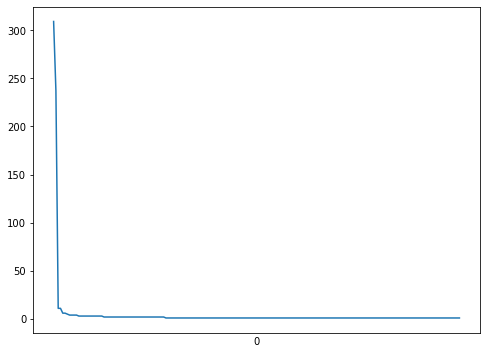

In [54]:
pd.DataFrame(y).value_counts().plot(xticks=[], figsize = [8,6], kind = 'line')

In [55]:
##### Avaliando parametros

In [56]:
from yellowbrick.model_selection import ValidationCurve

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X1_rfe, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(612, 20) (205, 20) (612,) (205,)


In [58]:
# RandomForest

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


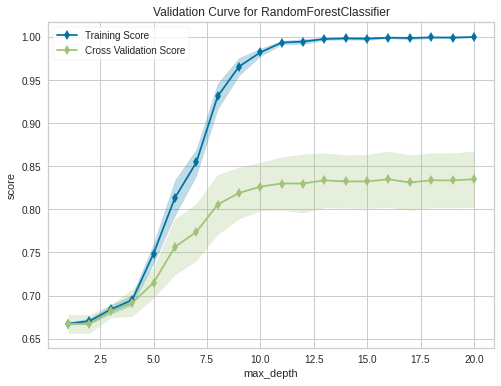

In [64]:
fig, ax = plt.subplots(figsize = [8,6])
vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                         param_name = "max_depth",
                         param_range=np.arange(1,21),
                         cv=10,
                         n_jobs=-1
                        )
vc_viz.fit(X1,y)
vc_viz.poof()
fig.savefig("validation_curve_max_depth_rf.png", dpi = 300)

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


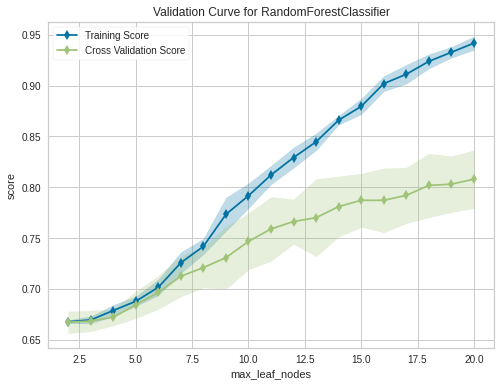

In [65]:
fig, ax = plt.subplots(figsize = [8,6])
vc_viz = ValidationCurve(RandomForestClassifier(n_estimators=100),
                         param_name = "max_leaf_nodes",
                         param_range=np.arange(1,21),
                         cv=10,
                         n_jobs=-1
                        )
vc_viz.fit(X1,y)
vc_viz.poof()
fig.savefig("validation_curve_max_leaf_nodes_rf.png", dpi = 300)

In [61]:
##### Avaliando a quantidade de dados

In [62]:
from yellowbrick.model_selection import LearningCurve

/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/henrique/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


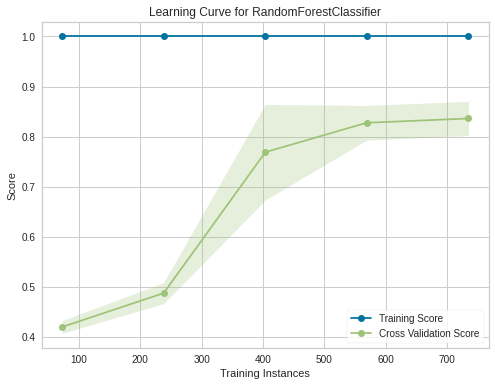

In [63]:
fig, ax = plt.subplots(figsize = [8,6])
lc_viz = LearningCurve(RandomForestClassifier(n_estimators=100),
                       cv=10
                      )
lc_viz.fit(X1,y)
lc_viz.poof()
fig.savefig("learning_curve_rf.png", dpi = 300)